## Computing autocovariance and autocorrelation of MSFT data any different lags

### Autocorreelation helps you understand whether past values of a time series have a linear relationship with future values.

In [1]:
# Fetch data from yahoo finance
import yfinance as yf

# For data manupulation
import pandas as pd
import numpy as np

# Time series analysis
import statsmodels.tsa.api as smt # .tsa is time-series analysis sub-pkg of the statsmodel library
import statsmodels.api as sm

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
# start date
start_date = pd.to_datetime('2021-01-01')

# end date
end_date = pd.to_datetime('2022-08-31')

# download microsoft close prises
df = pd.DataFrame(yf.download('MSFT', start=start_date, end=end_date, interval='1d', auto_adjust=True)['Close'])

[*********************100%***********************]  1 of 1 completed


In [3]:
df

Ticker,MSFT
Date,
2021-01-04,208.882187
2021-01-05,209.083740
2021-01-06,203.662292
2021-01-07,209.457916
2021-01-08,210.734116
...,...
2022-08-24,268.593201
2022-08-25,271.573303
2022-08-26,261.094086


In [4]:
df.info

<bound method DataFrame.info of Ticker            MSFT
Date                  
2021-01-04  208.882187
2021-01-05  209.083740
2021-01-06  203.662292
2021-01-07  209.457916
2021-01-08  210.734116
...                ...
2022-08-24  268.593201
2022-08-25  271.573303
2022-08-26  261.094086
2022-08-29  258.308746
2022-08-30  256.107758

[418 rows x 1 columns]>

In [5]:
df.describe

<bound method NDFrame.describe of Ticker            MSFT
Date                  
2021-01-04  208.882187
2021-01-05  209.083740
2021-01-06  203.662292
2021-01-07  209.457916
2021-01-08  210.734116
...                ...
2022-08-24  268.593201
2022-08-25  271.573303
2022-08-26  261.094086
2022-08-29  258.308746
2022-08-30  256.107758

[418 rows x 1 columns]>

In [6]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-22',
               '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26',
               '2022-08-29', '2022-08-30'],
              dtype='datetime64[ns]', name='Date', length=418, freq=None)

In [7]:
df.columns

Index(['MSFT'], dtype='object', name='Ticker')

In [8]:
df.head()

Ticker,MSFT
Date,
2021-01-04,208.882187
2021-01-05,209.083740
2021-01-06,203.662292
2021-01-07,209.457916
2021-01-08,210.734116


In [ ]:
# Compute returns of the Microsoft prices
df['returns'] = df.pct_change() # use * 100 to get in percentage; pass explicit column name if many columns in df, eg df['close'].pct_change()

# Drop NaN Values
df.dropna(inplace=True)

In [10]:
df

Ticker,MSFT,returns
Date,,
2021-01-05,209.083740,0.000965
2021-01-06,203.662292,-0.025930
2021-01-07,209.457916,0.028457
2021-01-08,210.734116,0.006093
2021-01-11,208.690308,-0.009699
...,...,...
2022-08-24,268.593201,-0.002351
2022-08-25,271.573303,0.011095
2022-08-26,261.094086,-0.038587


### autocovariance function up to lag 10 for the Microsoft price returns.

In [11]:
# Get the autocovvariance of the Microsoft price returns for 10 lags
smt.acovf(df['returns'])[:10]

array([ 2.88837305e-04, -1.46482498e-05, -2.40789195e-06, -2.07153695e-05,
        2.14472412e-05,  3.50466693e-06, -1.50624913e-05,  1.49269528e-05,
       -2.58163788e-05,  2.30333540e-05])

### compute the first 10 autocorrelation values

In [12]:
# Get autocorrelation of the price returns for 10 lags
smt.acf(df['returns'])[:10]

array([ 1.        , -0.05071454, -0.0083365 , -0.07171985,  0.07425371,
        0.01213371, -0.0521487 ,  0.05167945, -0.08938035,  0.07974508])

#### As we computed in notebook the autocorrelation at lag 0 is 1

## Plot autocorrelation function

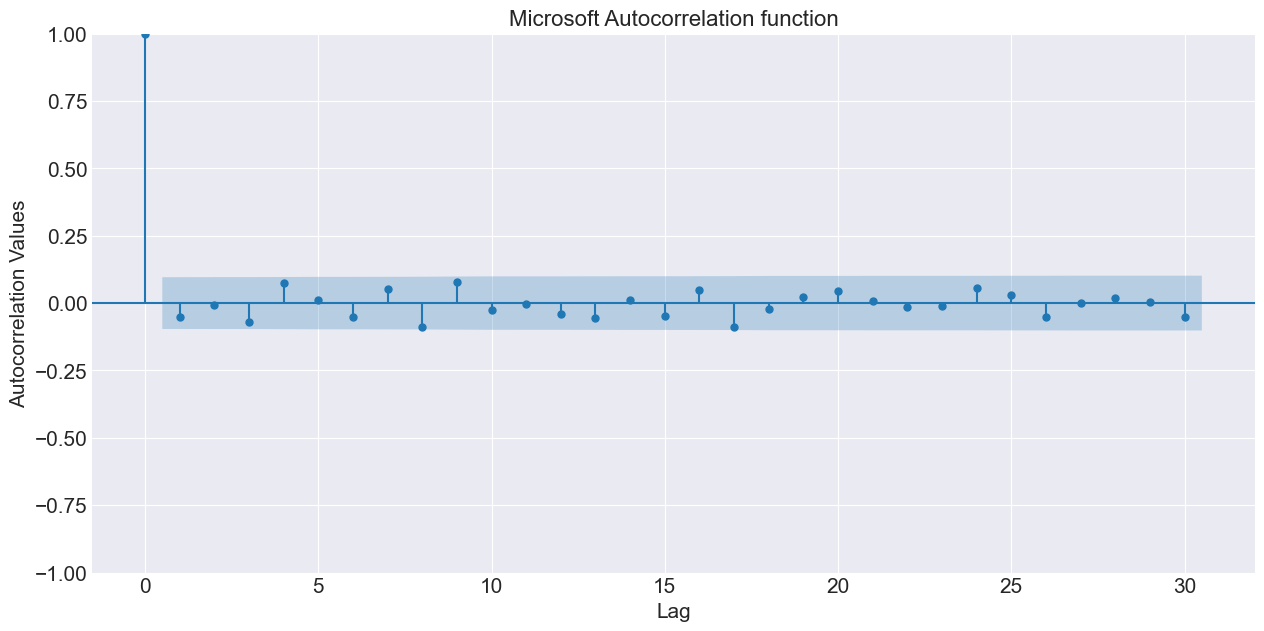

In [17]:
# set the fig size
fig, ax = plt.subplots(figsize=(15,7))

# plot autocorrelation function up to 30 lags
sm.graphics.tsa.plot_acf(df['returns'], lags=30, ax= ax)

# set the plot title
plt.title('Microsoft Autocorrelation function', size=16)

# Set the size and labels of both horizontal and vertical axis
plt.xlabel('Lag', size=15)
plt.ylabel('Autocorrelation Values', size=15)
plt.tick_params(labelsize=15) # ticks are small marks/labels along x-y axes. It lets you change how they look.

# Show the plot
plt.show()


#### Lags: Lag 1 mans today vs yesterday, lag 2 means today vs 2 days ago, etc
#### Autocorrelation values: Strength of relationship between values separated by that lag. +1 (Perfect +ve) to -1 (Perfect -ve) correlation
#### Blue shaded area: Confidence band (~95%) -> Any atuocorrelation values inside this band is statistically insignificant, meanint it could happen by random chance. Spicks outside the band tells correlation.